## Import Module

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time
from scipy.stats import entropy as scipy_entropy
from scipy.optimize import linear_sum_assignment as linear_assignment

## 讀取檔案

In [2]:
df = pd.read_csv('banana.csv')
X = df.drop('class', axis=1)
y = df['class']

## 標準化

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

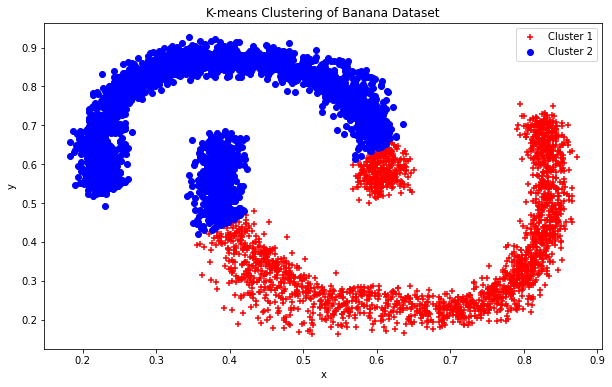

Clustering Elapsed Time: 1.05 s
SSE:  185.20249172852814
Entropy:  0.4553735886237091
Accuracy:  0.8285179796300145


In [4]:
# 開始計時
start_time = time.time()

# K-means 群聚
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df[['x', 'y']])

# 繪製散點圖
plt.figure(figsize=(10, 6))
plt.scatter(df['x'][kmeans_labels == 0], df['y'][kmeans_labels == 0], c='red', marker='+', label='Cluster 1')
plt.scatter(df['x'][kmeans_labels == 1], df['y'][kmeans_labels == 1], c='blue', marker='o', label='Cluster 2')
plt.title('K-means Clustering of Banana Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 計算 SSE
sse = kmeans.inertia_

# 計算熵
cluster_entropy = [scipy_entropy(df[kmeans_labels == i]['class'].value_counts(normalize=True)) for i in range(kmeans.n_clusters)]
mean_entropy = np.mean(cluster_entropy)

# 計算Accuracy
def calculate_accuracy(true_labels, predicted_labels):
    D = max(predicted_labels.max(), true_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(predicted_labels.size):
        w[predicted_labels[i], true_labels[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in zip(*ind)]) / predicted_labels.size

accuracy = calculate_accuracy(df['class'], kmeans_labels)

# 停止計時
end_time = time.time()
kmeans_elapsed_time = end_time - start_time

# 輸出結果
print("Clustering Elapsed Time: {:.2f} s".format(kmeans_elapsed_time))
print("SSE: ", sse)
print("Entropy: ", mean_entropy)
print("Accuracy: ", accuracy)